In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [5]:
temp_data=pd.read_csv('./Saif/city_temperature.csv')

C:\Users\sali\AppData\Local\Temp\ipykernel_21180\4001666215.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_data=pd.read_csv('./Saif/city_temperature.csv')


In [38]:
city_temps = temp_data.groupby(["City","Year","Month"])["AvgTemperature"].mean()

In [13]:
def getYearWise(city):
    city_year=temp_data.groupby(["City","Year"])["AvgTemperature"].mean()
    return city_year[city]

def getMonthWise(city,year):
    city_year=temp_data.groupby(["City","Year","Month"])["AvgTemperature"].mean()
    return city_year[city][year]




In [14]:
sample=(getMonthWise('Abidjan',1995))
sample

Month
1     79.916129
2     82.614286
3     82.545161
4     83.320000
5     82.403226
6     80.796667
7     78.500000
8     71.835484
9     77.263333
10    79.235484
11    81.853333
12    81.080645
Name: AvgTemperature, dtype: float64

In [15]:
def plotMonthWise(sample):
    sample.plot.bar()
    # Set the title and axis labels
    plt.title('Average Temperatures over Months For the Year',)
    plt.xlabel('Months')
    plt.ylabel('Temperature (°F)')
    # Show the plot
    plt.show()


In [19]:
def plotYearWise(sample):
    fig, ax = plt.subplots()
    sample.bar(ax=ax)
    # Set the title and axis labels
    plt.title('Average Temperatures Over the Years')
    plt.xlabel('Years')
    plt.ylabel('Temperature (°F)')
    # Show the plot
    st.pyplot(fig)

In [53]:
sample=(getYearWise('Abidjan'))
x=list(sample.index)


[1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [51]:
x=list(x)
x

[1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [11]:
cities

array(['Algiers', 'Bujumbura', 'Cotonou', 'Bangui', 'Brazzaville',
       'Cairo', 'Addis Ababa', 'Libreville', 'Banjul', 'Conakry',
       'Bissau', 'Abidjan', 'Nairobi', 'Rabat', 'Antananarivo',
       'Nouakchott', 'Lilongwe', 'Maputo', 'Windhoek', 'Niamey', 'Lagos',
       'Dakar', 'Freetown', 'Capetown', 'Lome', 'Tunis', 'Dar Es Salaam',
       'Kampala', 'Lusaka', 'Dhaka', 'Beijing', 'Chengdu', 'Guangzhou',
       'Shanghai', 'Shenyang', 'Hong Kong', 'Bombay (Mumbai)', 'Calcutta',
       'Chennai (Madras)', 'Delhi', 'Jakarta', 'Osaka', 'Sapporo',
       'Tokyo', 'Almaty', 'Bishkek', 'Vientiane', 'Kuala Lumpur',
       'Ulan-bator', 'Rangoon', 'Katmandu', 'Pyongyang', 'Islamabad',
       'Karachi', 'Manila', 'Singapore', 'Seoul', 'Colombo', 'Taipei',
       'Dusanbe', 'Bangkok', 'Ashabad', 'Tashkent', 'Hanoi', 'Brisbane',
       'Canberra', 'Melbourne', 'Perth', 'Sydney', 'Auckland', 'Tirana',
       'Vienna', 'Minsk', 'Brussels', 'Sofia', 'Zagreb', 'Nicosia',
       'Prague', 'Co

In [54]:
import requests

url = 'http://localhost:3000/data'  # replace with your API endpoint

response = requests.get(url)
json_data = response.json()

temp_data = pd.DataFrame(json_data)


In [55]:
co_data=pd.read_csv('./Saif\co2_emissions_kt_by_country.csv')



In [57]:

temp_data=pd.read_csv('./Saif\city_temperature.csv')

C:\Users\sali\AppData\Local\Temp\ipykernel_21180\2854384681.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_data=pd.read_csv('./Saif\city_temperature.csv')


In [60]:
co_data.columns=['country_code','Country',"Year",'Co2 Value']

In [66]:
country_year_temp = temp_data.groupby(['Country', 'Year'])['AvgTemperature'].mean()
country_year_df = country_year_temp.to_frame().reset_index()



In [68]:
merged_df = pd.merge(country_year_df, co_data, on=['Country','Year'])


In [106]:
merged_df.to_csv('merged_df.csv')

In [94]:
# grouped_df=merged_df.groupby(['Country', 'Year'])['AvgTemperature','Co2 Value'].mean()

C:\Users\sali\AppData\Local\Temp\ipykernel_21180\3845247846.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df=merged_df.groupby(['Country', 'Year'])['AvgTemperature','Co2 Value'].mean()


In [102]:
merged_df[merged_df['Country']=='Albania']



,Country,Year,AvgTemperature,country_code,Co2 Value
0,Albania,1995,-99.000000,ALB,1930.000000
1,Albania,1996,-99.000000,ALB,1940.000000
2,Albania,1997,-88.228767,ALB,1470.000000
3,Albania,1998,-46.195890,ALB,1790.000000
4,Albania,1999,26.696164,ALB,2970.000000
5,Albania,2000,54.757923,ALB,3170.000000
6,Albania,2001,10.750411,ALB,3230.000000
7,Albania,2002,41.512877,ALB,3759.999990
8,Albania,2003,61.872329,ALB,4070.000172
9,Albania,2004,61.085246,ALB,4250.000000


In [103]:
df=merged_df[merged_df['Country']=='Albania']

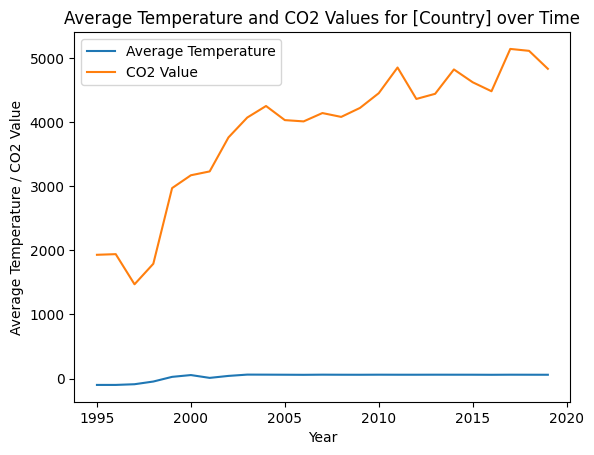

In [104]:
plt.plot(df['Year'], df['AvgTemperature'], label='Average Temperature')
plt.plot(df['Year'], df['Co2 Value'], label='CO2 Value')

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Average Temperature / CO2 Value')
plt.title('Average Temperature and CO2 Values for [Country] over Time')
# Add a legend
plt.legend()
# Display the plot
plt.show()

In [107]:
def tempCo2Plot(country):
    df=merged_df[merged_df['Country']==country]
    plt.plot(df['Year'], df['AvgTemperature'], label='Average Temperature')
    plt.plot(df['Year'], df['Co2 Value'], label='CO2 Value')

    # Add axis labels and title
    plt.xlabel('Year')
    plt.ylabel('Average Temperature / CO2 Value')
    plt.title('Average Temperature and CO2 Values for',country,'over Time')
    # Add a legend
    plt.legend()
    # Display the plot
    plt.show()
    
    

In [109]:
countryList = merged_df['Country'].unique()


In [112]:
countryList

array(['Albania', 'Algeria', 'Argentina', 'Australia', 'Austria',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bolivia', 'Brazil', 'Bulgaria',
       'Burundi', 'Canada', 'Central African Republic', 'China',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark',
       'Dominican Republic', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Georgia', 'Germany', 'Greece', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia',
       'Lebanon', 'Madagascar', 'Malawi', 'Malaysia', 'Mauritania',
       'Mexico', 'Mongolia', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'New Zealand', 'Nicaragua', 'Nigeria', 'Norway', 'Oman',
       'Pakistan', 'Panama', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Qatar', 'Romania', 'Saudi Arabia',

In [ ]:
tempCo2Plot('Zambia')

,Country,Year,AvgTemperature,country_code,Co2 Value
0,Albania,1995,-99.000000,ALB,1930.000000
1,Albania,1996,-99.000000,ALB,1940.000000
2,Albania,1997,-88.228767,ALB,1470.000000
3,Albania,1998,-46.195890,ALB,1790.000000
4,Albania,1999,26.696164,ALB,2970.000000
...,...,...,...,...,...
2399,Zambia,2010,66.271781,ZMB,2660.000086
2400,Zambia,2011,62.468767,ZMB,3049.999952
2401,Zambia,2012,68.364481,ZMB,4030.000210
2402,Zambia,2013,31.056164,ZMB,4239.999771


In [117]:
new_data = merged_df.groupby(['Country'])['AvgTemperature','Co2 Value'].mean()


C:\Users\sali\AppData\Local\Temp\ipykernel_21180\182931254.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_data = merged_df.groupby(['Country'])['AvgTemperature','Co2 Value'].mean()


In [128]:
new_data = new_data.reset_index()
new_data

,index,Country,AvgTemperature,Co2 Value
0,0,Albania,32.906225,3846.400003
1,1,Algeria,63.839452,111102.800049
2,2,Argentina,62.192001,153519.201489
3,3,Australia,61.530112,362877.199316
4,4,Austria,51.136993,67102.799872
...,...,...,...,...
96,96,United Kingdom,51.070948,482292.399707
97,97,Uruguay,60.859445,6189.200017
98,98,Uzbekistan,58.914427,115990.800562
99,99,Vietnam,74.796112,127070.799792


In [144]:
def plot(new_data):
    x=50
    feature1 =new_data['Country'].iloc[:x]
    feature2 =new_data['AvgTemperature'].iloc[:x]*1000
    feature3 =new_data['Co2 Value'].iloc[:x]

    
    barWidth = 0.3
    plt.figure(figsize=(30,10))
    r1 = np.arange(len(feature1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    plt.title('CO2 VALUES AND TEMPERATURES')
    plt.bar(r1, feature2, color='red', width=barWidth, edgecolor='white', label='Temperature')
    plt.bar(r2, feature3, color='blue', width=barWidth, edgecolor='white', label='CO2')
    plt.xlabel('Countries')
    plt.ylabel('co2values/temperature')
    plt.xticks([r + 2 * barWidth for r in range(len(feature1))], feature1, rotation=45)
    plt.legend()

    plt.show()


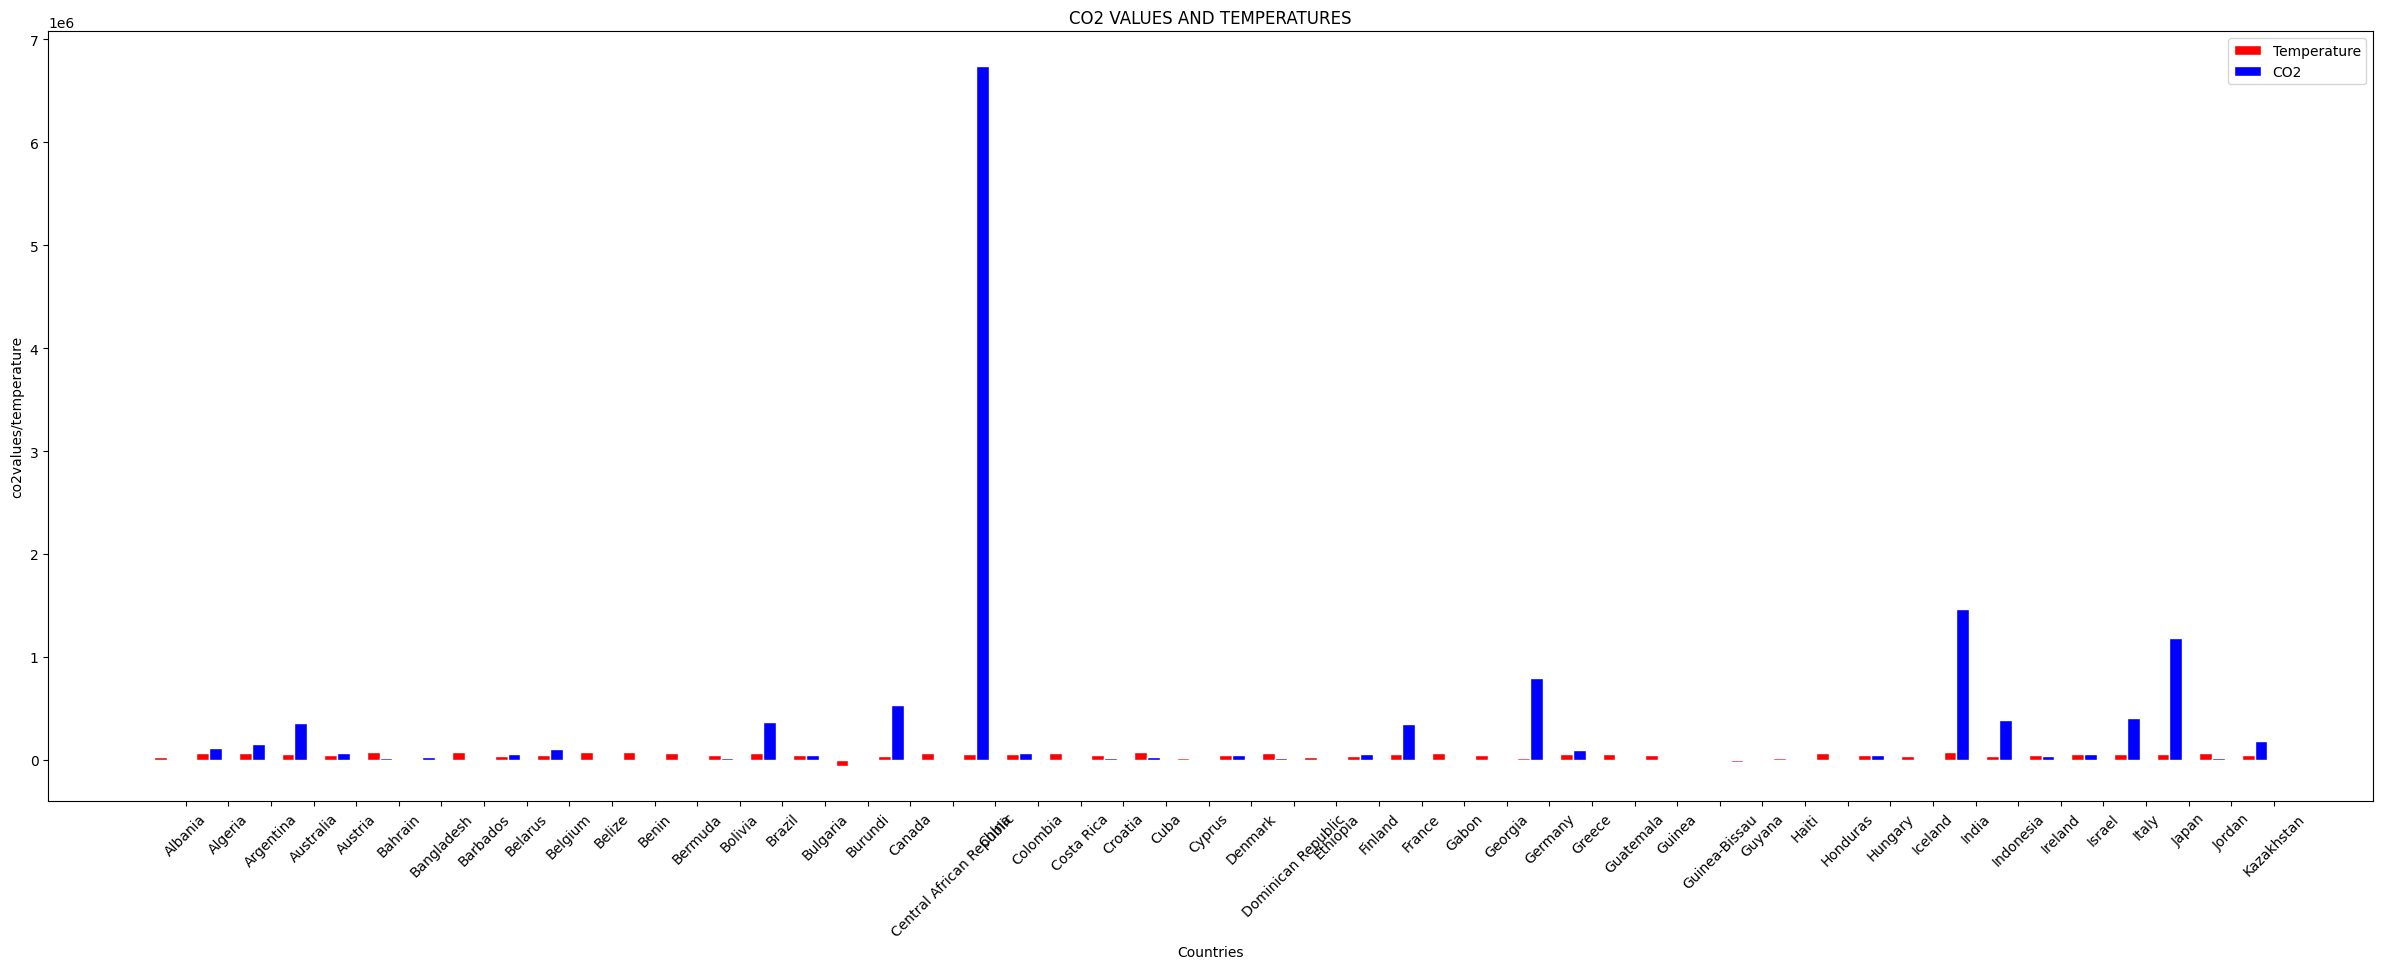

In [145]:
plot(new_data)

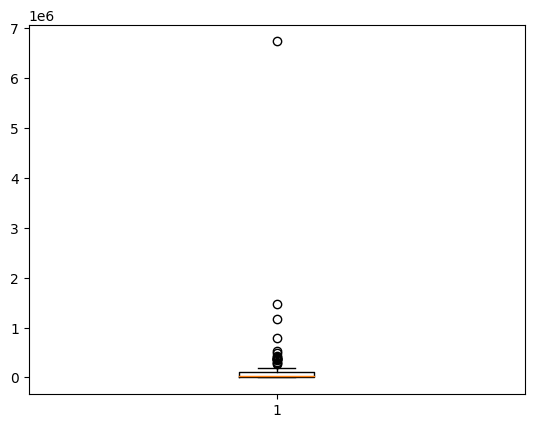

In [146]:
outliers1 = plt.boxplot(new_data['Co2 Value']).get('fliers')[0].get_data()[1]

In [147]:
outliers1

array([ 362877.19931641,  369453.59760742,  532741.20195312,
       6736641.1703125 ,  349758.79853516,  792935.20214844,
       1469935.19970703,  386816.80126953,  403659.19814453,
       1179945.18828125,  423389.19775391,  307941.59951172,
        377636.80170898,  374527.20141602,  281282.39892578,
        278304.40112305,  482292.39970703])

array([-62.95332186,   1.2424586 , -22.02320199, -18.46371597,
        -9.83424239])

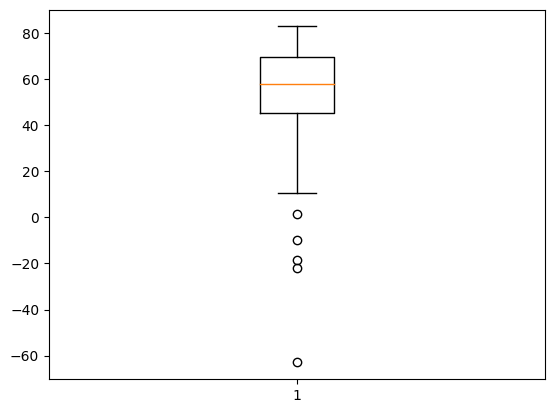

In [163]:
outliers2=plt.boxplot(new_data['AvgTemperature']).get('fliers')[0].get_data()[1]
outliers2

In [164]:
df_sorted = new_data.sort_values('Co2 Value')
df_sorted

,index,Country,AvgTemperature,Co2 Value
16,16,Burundi,-62.953322,1.969231e+02
18,18,Central African Republic,66.807165,2.040000e+02
36,36,Guinea-Bissau,1.242459,2.268000e+02
79,79,Sierra Leone,-9.834242,4.388235e+02
10,10,Belize,73.340336,5.656000e+02
...,...,...,...,...
17,17,Canada,41.314679,5.327412e+05
32,32,Germany,18.267287,7.929352e+05
47,47,Japan,55.991252,1.179945e+06
42,42,India,79.794460,1.469935e+06


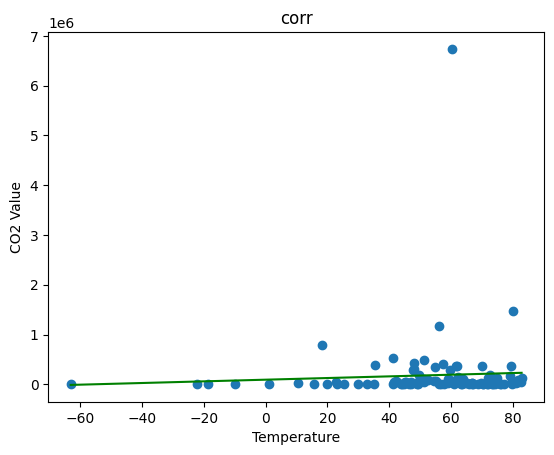

In [158]:
x=new_data['AvgTemperature']
y=new_data['Co2 Value']
plt.title('corr')
plt.scatter(x,y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='green')
plt.xlabel("Temperature")
plt.ylabel('CO2 Value')    
plt.show()

In [ ]:
getYearWise()